Przygotować programy do aproksymacji średniokwadratowej trygonometrycznej

In [3]:
import numpy as np
from math import pi, sin, cos
import matplotlib.pyplot as plt
from copy import deepcopy

In [4]:
def f(x):
    return 30 + (x**2 / 1.5) - 30 * cos(1.5 * x)

f_range_a = -4 * pi
f_range_b = 4 * pi

In [5]:
def plot_function(func, range_a, range_b, title, color):
    
    func_x = np.linspace(range_a, range_b, 10000)
        
    func_y = [func(func_x[i]) for i in range(len(func_x))]

    plt.plot(func_x, func_y, label = title, color = color)

    plt.legend()
    plt.grid(True)
    plt.savefig("zadana_funkcja.png")

In [6]:
def approx(xs_original, ys, n, m):
    
    xs = deepcopy(xs_original) # So original data won't get destroyed
    
    a_from = f_range_a
    b_from = f_range_b
    a_to = -pi
    b_to = pi
    
    transform = lambda x : ((x - a_from) / (b_from - a_from)) * (b_to - a_to) + a_to
    
    xs = list(map(transform, xs))
    
    A = lambda j : (2 / n) * sum(ys[i] * cos(j * xs[i]) for i in range(n))
    
    B = lambda j : (2 / n) * sum(ys[i] * sin(j * xs[i]) for i in range(n))
        
    return lambda x : 0.5 * A(0) + sum(A(j) * cos(j * transform(x)) + B(j) * sin(j * transform(x)) for j in range(1, m))


In [9]:
def draw_approx(n, m):
    
    xs = np.linspace(f_range_a, f_range_b, n)
    ys = list(map(f, xs))
    
    calculated_function = approx(xs, ys, n, m)

    plot_function(f, f_range_a, f_range_b, "Zadana funkcja", "blue")
    plot_function(calculated_function, f_range_a, f_range_b, "Funkcja aproksymująca", "red")

    plt.scatter(xs, ys, color = 'black', label = "Nodes")
    plt.title("Function approximation")
    plt.legend()
    plt.grid(True)
    plt.savefig("approximation.png")
    plt.show()

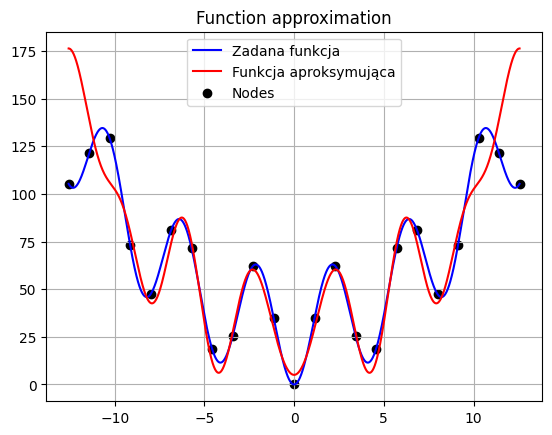

In [10]:
draw_approx(23, 9)